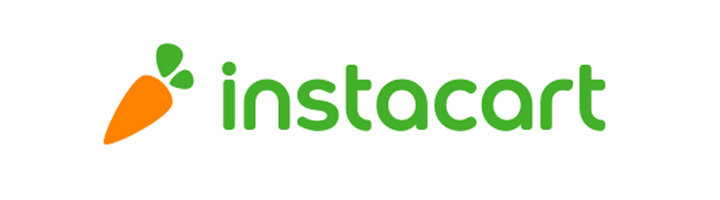

# Instacart Project

   ## Instacart : a grocery ordering and delivery app
   
   ### Our Goal : to predict which products will be in a user’s next order with items previously purchased

In [3]:
import pandas as pd
import numpy as np



orders=pd.read_csv('../folder/orders.csv')





In [11]:
orders.order_number.max()

100

In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


# Look at data 

In [33]:
# 134 rows
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [34]:
# 21 rows
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [35]:
# 49,688 rows
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [36]:
# 3,421,083 rows
orders.head()
# order_id : order identifier (not related to order_number)
# user_id: customer identifier 
# eval_set: which evaluation set this order belongs in    
    # "prior": orders prior to that users most recent order (~3.2m orders) - for Train 
    # "train": training data supplied to participants (~131k orders) - some last order of order_number in same use_id
    # "test": test data reserved for machine learning competitions (~75k orders) - other last order of order_number in same use_id
# order_number: the order sequence number for this user (1 = first, n = nth, last order = between 4 and 100)
# order_dow: the day of the week the order was placed on (0 ~ 6)
# order_hour_of_day: the hour of the day the order was placed on (0 ~ 23)
# days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1) 

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [37]:
# 1,384,617 rows
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [38]:
# 32,434,489 rows
priors = order_products__train
priors.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [39]:
prods = pd.DataFrame()


In [40]:
prods['orders'] = priors.groupby(priors.product_id).size().astype(np.int32)
prods

,orders
product_id,
1,76
2,4
3,6
4,22
5,1
7,1
8,13
9,5
10,119


In [41]:
prods['reorders'] = priors['reordered'].groupby(priors.product_id).sum().astype(np.float32)
prods

,orders,reorders
product_id,,
1,76,49.0
2,4,1.0
3,6,6.0
4,22,14.0
5,1,1.0
7,1,1.0
8,13,7.0
9,5,2.0
10,119,70.0


In [42]:
prods['reorder_rate'] = (prods.reorders / prods.orders).astype(np.float32)


In [43]:
products = products.join(prods, on='product_id')
products

,product_id,product_name,aisle_id,department_id,orders,reorders,reorder_rate
0,1,Chocolate Sandwich Cookies,61,19,76.0,49.0,0.644737
1,2,All-Seasons Salt,104,13,4.0,1.0,0.250000
2,3,Robust Golden Unsweetened Oolong Tea,94,7,6.0,6.0,1.000000
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,22.0,14.0,0.636364
4,5,Green Chile Anytime Sauce,5,13,1.0,1.0,1.000000
5,6,Dry Nose Oil,11,11,NaN,NaN,NaN
6,7,Pure Coconut Water With Orange,98,7,1.0,1.0,1.000000
7,8,Cut Russet Potatoes Steam N' Mash,116,1,13.0,7.0,0.538462
8,9,Light Strawberry Blueberry Yogurt,120,16,5.0,2.0,0.400000
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,119.0,70.0,0.588235


In [44]:
products.set_index('product_id', drop=False, inplace=True)
products

,product_id,product_name,aisle_id,department_id,orders,reorders,reorder_rate
product_id,,,,,,,
1,1,Chocolate Sandwich Cookies,61,19,76.0,49.0,0.644737
2,2,All-Seasons Salt,104,13,4.0,1.0,0.250000
3,3,Robust Golden Unsweetened Oolong Tea,94,7,6.0,6.0,1.000000
4,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,22.0,14.0,0.636364
5,5,Green Chile Anytime Sauce,5,13,1.0,1.0,1.000000
6,6,Dry Nose Oil,11,11,NaN,NaN,NaN
7,7,Pure Coconut Water With Orange,98,7,1.0,1.0,1.000000
8,8,Cut Russet Potatoes Steam N' Mash,116,1,13.0,7.0,0.538462
9,9,Light Strawberry Blueberry Yogurt,120,16,5.0,2.0,0.400000


In [45]:
orders.set_index('order_id', inplace=True, drop=False)
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,
2539329,2539329,1,prior,1,2,8,NaN
2398795,2398795,1,prior,2,3,7,15.0
473747,473747,1,prior,3,3,12,21.0
2254736,2254736,1,prior,4,4,7,29.0
431534,431534,1,prior,5,4,15,28.0
3367565,3367565,1,prior,6,2,7,19.0
550135,550135,1,prior,7,1,9,20.0
3108588,3108588,1,prior,8,1,14,14.0
2295261,2295261,1,prior,9,1,16,0.0


In [46]:
priors.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [49]:
priors = priors.join(orders, on='order_id', rsuffix='_')
priors

,order_id,product_id,add_to_cart_order,reordered,order_id_,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_id_,user_id_,eval_set_,order_number_,order_dow_,order_hour_of_day_,days_since_prior_order_
0,1,49302,1,1,1,112108,train,4,4,10,9.0,1,112108,train,4,4,10,9.0
1,1,11109,2,1,1,112108,train,4,4,10,9.0,1,112108,train,4,4,10,9.0
2,1,10246,3,0,1,112108,train,4,4,10,9.0,1,112108,train,4,4,10,9.0
3,1,49683,4,0,1,112108,train,4,4,10,9.0,1,112108,train,4,4,10,9.0
4,1,43633,5,1,1,112108,train,4,4,10,9.0,1,112108,train,4,4,10,9.0
5,1,13176,6,0,1,112108,train,4,4,10,9.0,1,112108,train,4,4,10,9.0
6,1,47209,7,0,1,112108,train,4,4,10,9.0,1,112108,train,4,4,10,9.0
7,1,22035,8,1,1,112108,train,4,4,10,9.0,1,112108,train,4,4,10,9.0
8,36,39612,1,0,36,79431,train,23,6,18,30.0,36,79431,train,23,6,18,30.0
9,36,19660,2,1,36,79431,train,23,6,18,30.0,36,79431,train,23,6,18,30.0


In [ ]:
priors.drop('order_id_', inplace=True, axis=1)